I will do a quick simulation of a gold NP diffraction pattern. Note this requires the thor package and a gold coordinates model.

https://github.com/tjlane/thor

In [1]:
% pylab inline
import thor
from thor import structure
from thor import scatter

Populating the interactive namespace from numpy and matplotlib


In [24]:
detector_dist = 70.0 # mm
energy        = 9.5    # keV

epix_shape   = (352*2, 384*2)
epix_px_size = 50.0 / 1000.0 # mm
 
s = np.array([ 0.0, -1.0, 0.0]) * epix_px_size
f = np.array([ 1.0,  0.0, 0.0]) * epix_px_size
p = np.array([ 20.0,  0.0, detector_dist]) # position of detector corner

bg = thor.BasisGrid([(p, s, f, epix_shape)])
dtc = thor.Detector(bg, thor.Beam(energy=energy))
print dtc.q_max

gold = structure.load_coor('gold_fcc_sphere_5nm.coor')

3.62633160953


In [22]:
num_molecules = 100
amps   = scatter.simulate_atomic(gold, num_molecules, dtc)
intens = np.square(np.abs(amps))

CPU Thread 0 :: 100 shots


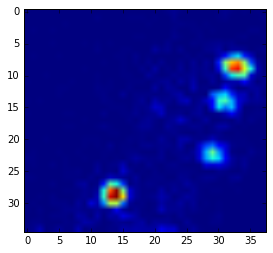

In [23]:
imshow(intens.reshape(epix_shape))

In [29]:
#np.save('gold_speckle.npy', intens.reshape(epix_shape))